## Pacotes

In [1]:
from LightPipes import *
import matplotlib.pyplot as plt
import numpy as np
import scipy
import math

#Campo

In [2]:
def Lambda(M,N,sigma,delta):
    a = 1/(4*sigma**2) # [L]^-2
    b = 1/(2*delta**2) # [L]^-2
    c = 2*np.sqrt( a**2 + 2*a*b )
    L = ( np.pi/(a + b + c/2) )*( (a + b - c/2)/( a + b + c/2 ) )**( abs(M)/2 + N )
    return L

def data_GSM(n=2**6,dx= 20*um,sigma=.1*mm,delta=.1*mm,L=50,P=50,cutoff00=0.015):
    Numero_de_Soma_Inc = 0
    for j in range(-L,L+1):
        for jj in range(P+1):
            cutoff  = Lambda(j,jj,sigma,delta)/Lambda(0,0,sigma,delta)
            if (cutoff >= cutoff00):
                Numero_de_Soma_Inc +=1

    #Parâmetros do feixe GSM
    #n     = 2**6          # Dimensão
    #dx    = 20*um         # Tamanho do pixel
    x = np.arange(-n/2, n/2,1)*dx
    xx,yy = np.meshgrid(x,x)

    #Gerando os campos para a soma incoerente

    a = 1/(4*sigma**2) # [L]^-2
    b = 1/(2*delta**2) # [L]^-2
    c = 2*np.sqrt( a**2 + 2*a*b )
    w = np.sqrt( 2/c )
    weights_00 = Lambda(0,0,sigma,delta)

    Campos =  np.exp( 1j*np.zeros((Numero_de_Soma_Inc,n,n))) # Campo
    W_gsm =  np.zeros((n,n)) # Campo
    weights_lista = np.zeros(Numero_de_Soma_Inc)
    modes_lista = []
    i = 0
    for jj in range(P+1):
        for j in range(-L,L+1):
            weights = Lambda(j,jj,sigma,delta)
            cutoff  = weights/weights_00
            if (cutoff >= 0.015):
                r    = np.sqrt(xx**2+yy**2)
                C    = np.sqrt(2*math.factorial(jj)/(np.pi*math.factorial(jj+abs(j))))
                PL   = scipy.special.assoc_laguerre(2*r**2/w**2,jj,abs(j))
                Fase = np.exp(- 1j*j*np.arctan2(yy,xx) )

                LG   = C*1/w*(r*np.sqrt(2)/w)**abs(j)*PL*np.exp(-r**2/w**2)*Fase

                Campos[i,:,:] = LG
                W_gsm += abs( np.sqrt(weights)*LG )**2 # Intensidade de cada modo
                weights_lista[i] = weights
                modes_lista.append([jj,j])
                i += 1

    return Campos,W_gsm,weights_lista,modes_lista

In [3]:
dt = data_GSM()

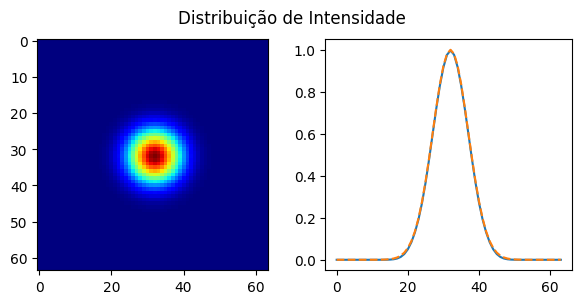

In [3]:
dt = data_GSM()
n = 2**6
dx = 20*um
sigma = .1*mm

x = np.arange(-n/2, n/2,1)*dx
xx,yy = np.meshgrid(x,x)
B = np.exp(-xx[n//2]**2/(2*sigma**2) )
# campo total --> soma incoerente
A =  dt[1]
#A = A/A.max()

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(7,3))
fig.suptitle('Distribuição de Intensidade')

ax1.imshow(A,cmap="jet")
ax2.plot(A[:,n//2])
ax2.plot(B,"--")
plt.show()